In [1]:
# import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


In [2]:
# load the csv file
df = pd.read_csv('data/WWWusage.csv', names=['index', 'time', 'value'], header=0)

In [3]:
# check the first five lines 
df.head(5)

,index,time,value
0,1,1,88
1,2,2,84
2,3,3,85
3,4,4,85
4,5,5,84


In [4]:
# drop unnessary columns named index and time 
df.drop(columns=['index', 'time'], inplace=True)

In [5]:
df.head(5)

,value
0,88
1,84
2,85
3,85
4,84


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   100 non-null    int64
dtypes: int64(1)
memory usage: 928.0 bytes


In [7]:
df.describe()

,value
count,100.000000
mean,137.080000
std,39.999414
min,83.000000
25%,99.000000
50%,138.500000
75%,167.500000
max,228.000000


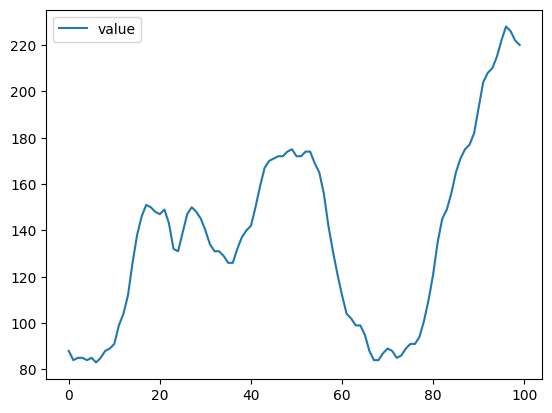

In [8]:
# visulatization
df.plot();

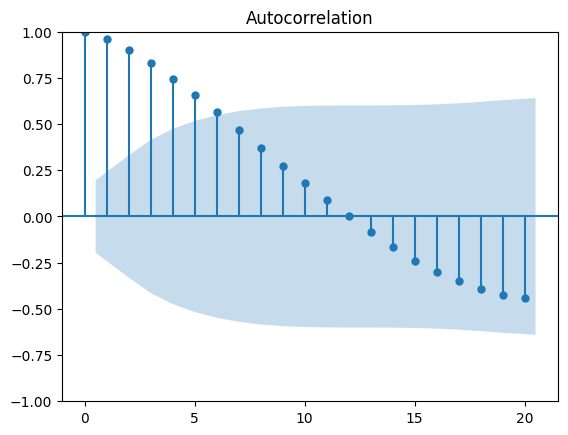

In [9]:
# there is trend in the data 
# difference to make stationary 
plot_acf(df.value);

Plot ACFs for determing the degrees of "d" after differencing.

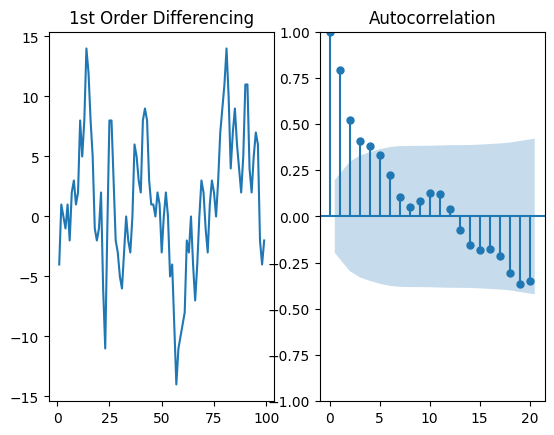

In [10]:
# plot 1st order differencing 
fig = plt.figure()
ax1 = fig.add_subplot(121)  # Corrected typo here
ax1.set_title('1st Order Differencing')
ax1.plot(df['value'].diff());

ax2 = fig.add_subplot(122)
plot_acf(df['value'].diff().dropna(), ax=ax2);
plt.show()

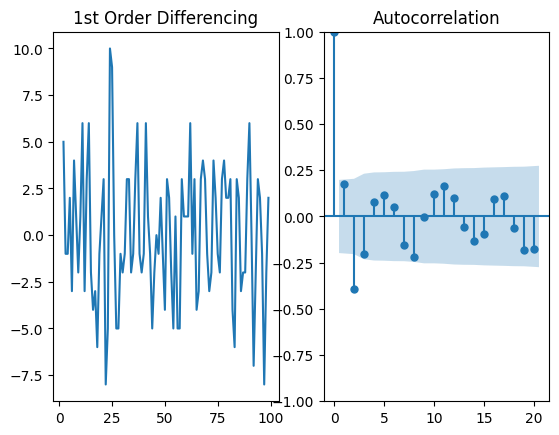

In [11]:
# plot 1st order differencing 
fig = plt.figure()
ax1 = fig.add_subplot(121)  # Corrected typo here
ax1.set_title('1st Order Differencing')
ax1.plot(df['value'].diff().diff());

ax2 = fig.add_subplot(122)
plot_acf(df['value'].diff().diff().dropna(), ax=ax2);

In [12]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
result = adfuller(df.value.dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(df.value.diff().diff().dropna())
print('p-value: ', result[1])


p-value:  0.12441935447109453
p-value:  0.07026846015272707
p-value:  2.8434287555471576e-17


In [14]:
adfuller_test(df.value)

ADF Test Statistic : -2.4642397172033688
p-value : 0.12441935447109453
#Lags Used : 3
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [15]:
adfuller_test(df.value.diff().dropna())

ADF Test Statistic : -2.722238490442953
p-value : 0.07026846015272707
#Lags Used : 2
Number of Observations Used : 96
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
adfuller_test(df.value.diff().diff().dropna())

ADF Test Statistic : -9.929762173626015
p-value : 2.8434287555471576e-17
#Lags Used : 1
Number of Observations Used : 96
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


p-value < 0.05 

Therefore, d = 2 .
but d= 1 is also approximate to p-value. 

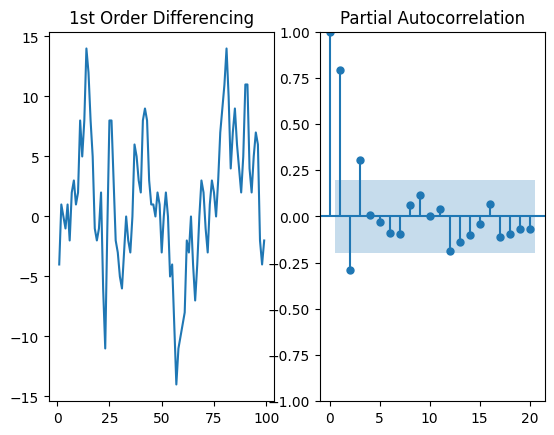

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff())

ax2 = fig.add_subplot(122)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

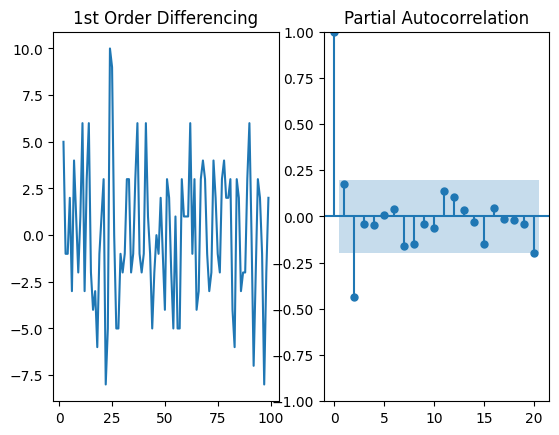

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.value.diff().diff())

ax2 = fig.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

In determing "p", we take the most significant lags. In both differencings, there is only 1 signigicant lag. Therefore, p = 1.

"q" is determined by looking at the no. of lags crossing the threshold in ACFs. <<ones with high correlation>>

In [19]:
# p = 1, d = 1, 1 = 2
arima_model= ARIMA(df.value, order=(1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Thu, 20 Jun 2024   AIC                            516.253
Time:                        11:26:46   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

In [20]:
# p = 1, d = 2, 1 = 2
arima_model= ARIMA(df.value, order=(1,2,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -252.594
Date:                Thu, 20 Jun 2024   AIC                            513.189
Time:                        11:26:47   BIC                            523.529
Sample:                             0   HQIC                           517.371
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6531      0.103      6.359      0.000       0.452       0.854
ma.L1         -0.4745      3.855     -0.123      0.902      -8.029       7.080
ma.L2         -0.5251      2.003     -0.262      0.7

In [21]:
# p = 1, d = 1, 1 = 3
arima_model= ARIMA(df.value, order=(1,1,3))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -252.289
Date:                Thu, 20 Jun 2024   AIC                            514.577
Time:                        11:26:47   BIC                            527.553
Sample:                             0   HQIC                           519.827
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8580      0.129      6.651      0.000       0.605       1.111
ma.L1          0.3429      0.174      1.971      0.049       0.002       0.684
ma.L2         -0.2852      0.197     -1.447      0.1

<Figure size 1600x800 with 0 Axes>

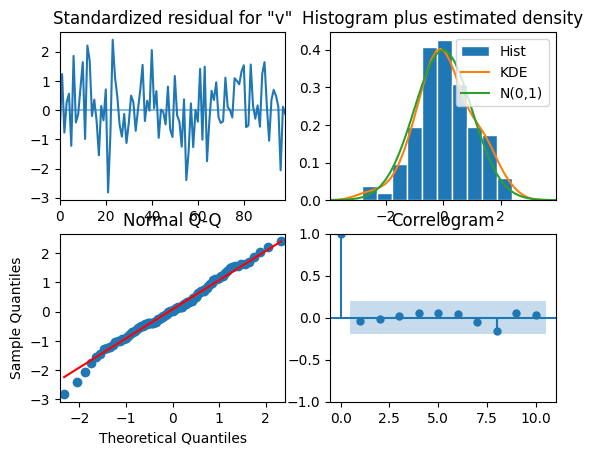

In [22]:
fig = plt.figure(figsize=(16, 8))
model.plot_diagnostics()
plt.show()

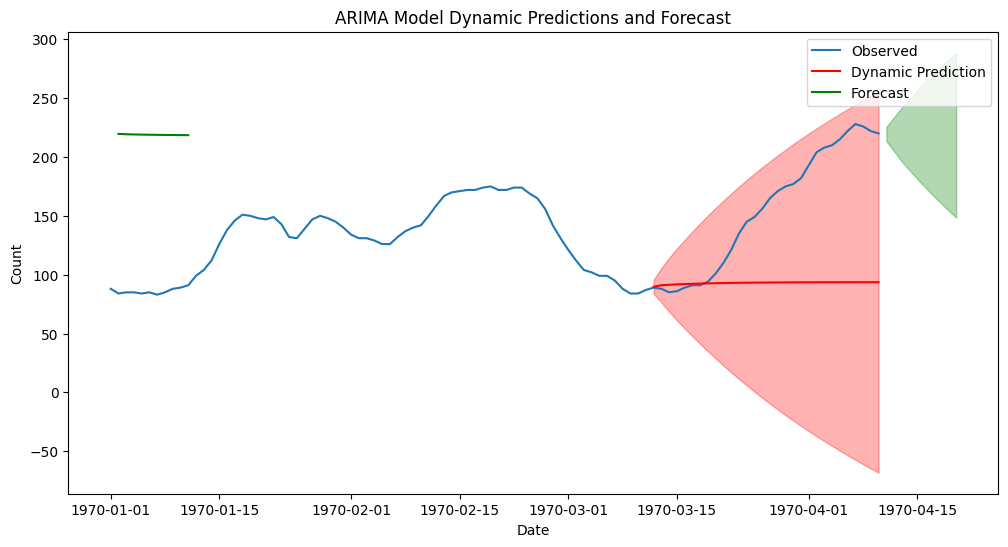

In [23]:
#model.plot_predict(dynamic=True)
#plt.show() 

# Generate dynamic in-sample predictions
dynamic_start = len(df) - 30  # Start dynamic prediction 30 steps before the end of the sample
pred_dynamic = model.get_prediction(start=dynamic_start, dynamic=True)
pred_dynamic_ci = pred_dynamic.conf_int()

# Generate out-of-sample forecast (future predictions)
steps = 10  # Number of steps to forecast
forecast = model.get_forecast(steps=steps)
forecast_ci = forecast.conf_int()

# Plot the actual data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'], label='Observed')

# Plot dynamic predictions
plt.plot(pred_dynamic.predicted_mean.index, pred_dynamic.predicted_mean, label='Dynamic Prediction', color='red')
plt.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='red', alpha=0.3)

# Plot forecast
forecast_index = pd.date_range(start=df.index[-1], periods=steps+1)[1:]
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='green', alpha=0.3)

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('ARIMA Model Dynamic Predictions and Forecast')
plt.legend()
plt.show()

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [25]:
# Fit an ARIMA model
model = sm.tsa.ARIMA(df['value'], order=(1, 1, 1))
results = model.fit()

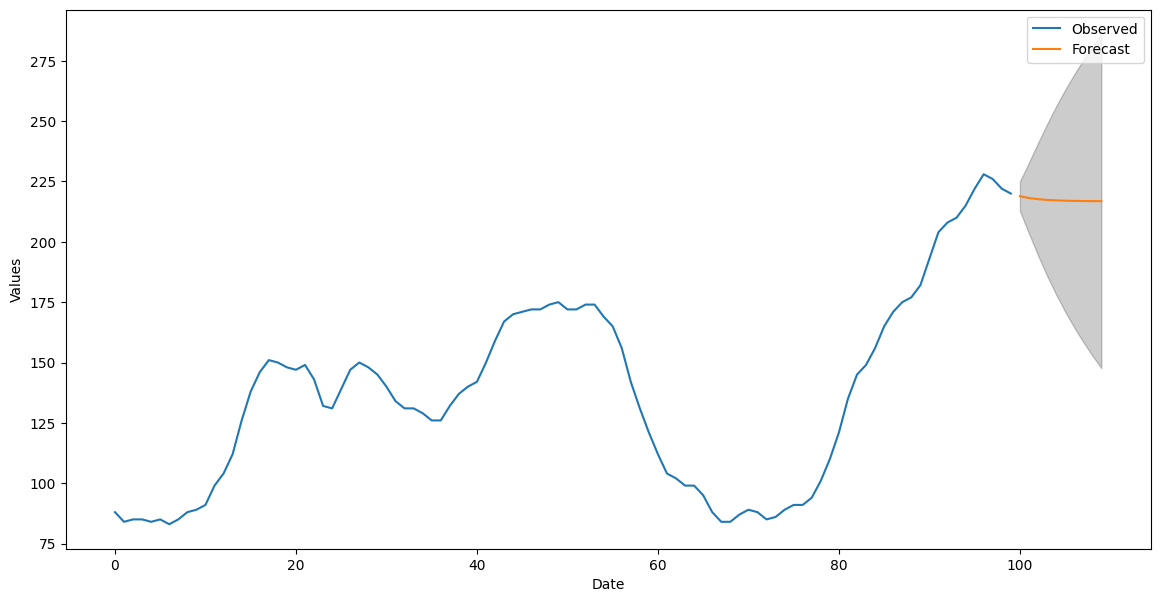

In [26]:
# Generate predictions
start = len(df)
end = len(df) + 10  # Predict the next 10 periods
pred = results.get_forecast(steps=10)
pred_ci = pred.conf_int()

# Plot the actual data
df['value'].plot(label='Observed', figsize=(14, 7))

# Plot the forecasted values
pred.predicted_mean.plot(label='Forecast')

# Plot the confidence intervals
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()